In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
train = pd.read_csv('data/emnist-balanced-train.csv', header=None)
test  = pd.read_csv("data/emnist-balanced-test.csv", header=None)

Making a dictionary of the actual ascii value and the converted value in the dataset

In [37]:
mapping = pd.read_csv('data/emnist-balanced-mapping.txt', sep = " ", header = None)

In [38]:
converted = mapping[0]
actual = mapping[1]

In [39]:
mapp = {}

In [40]:
for i, j in zip(converted, actual):
    mapp[i] = j

In [41]:
chr(mapp[3])

'3'

In [42]:
train_y = train.iloc[:, 0]
train_x = train.iloc[:, 1:]
test_y = test.iloc[:, 0]
test_x = test.iloc[:, 1:]

In [43]:
num_classes = 47
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)

# Visualizing

In [15]:
image = train_x.iloc[79].values

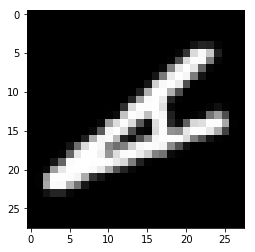

In [16]:
plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

In [18]:
chr(mapp[train_y[79].argmax()])

'A'

The images are rotated. Rotating them to get the actual character's image

In [44]:
#rotates images 
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_x = np.apply_along_axis(rotate, 1, train_x)/255
test_x = np.apply_along_axis(rotate, 1, test_x)/255

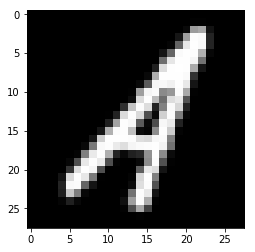

In [45]:
image = train_x[79]
plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

In [21]:
inp = Input(shape=(784,))
h1 = Dense(1024, activation='relu')(inp)
d1 = Dropout(0.2)(h1)
h2 = Dense(1024, activation='relu')(d1)
d2 = Dropout(0.2)(h2)
out = Dense(num_classes, activation='softmax')(d2) 
model = Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy
checkpointer = ModelCheckpoint('model-emnist-nn.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [ ]:
history=model.fit(train_x, train_y, # Train the model using the training set...
          batch_size=512, nb_epoch=50,
          verbose=1, validation_split=0.1,callbacks=[earlystopper,checkpointer]) # ...holding out 10% of the data for validation

In [ ]:
model.evaluate(test_x, test_y, verbose=1)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [46]:
from keras.models import model_from_json

In [47]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [48]:
loaded_model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy'])

In [49]:
loaded_model.evaluate(test_x, test_y, verbose=1)

18800/18800 [==============================] - 3s 184us/step


[0.36413293744972414, 0.8838297872340426]

# The models gives an 88.38% accuracy on the test set